# House Prices: Advanced Regression Techniques

In [288]:
# Importing all the packages:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Scaling data
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

# PCA Model
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

## Data Import and Preperation

In [2]:
# Data import
dtrain = pd.read_csv('train.csv')
dtest = pd.read_csv('test.csv')

In [3]:
dtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
dtrain.shape

(1460, 81)

In [5]:
dtest.shape

(1459, 80)

In [7]:
dtrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
dtest.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
dtrain.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
dtest['SalePrice'] = 0.0

In [14]:
# Merging both data set for cleaning
dall = dtrain.append(dtest,ignore_index=True)

In [15]:
dall.shape

(2919, 81)

### Data Cleaning: Missing Value

In [154]:
dall.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [128]:
dall1 = dall.copy()

In [129]:
dall1.loc[dall1['MSZoning'].isnull(),'MSZoning'] = dall1['MSZoning'].mode()[0]

In [130]:
dall1.loc[dall1['LotFrontage'].isnull(),'LotFrontage'] = np.sqrt(dall1.loc[dall1['LotFrontage'].isnull(),'LotArea'])

In [131]:
dall1.drop('Alley',axis=1,inplace=True)

In [132]:
dall1.drop('Utilities',axis=1,inplace=True)

In [133]:
dall1.loc[dall1['Exterior1st'].isnull(),'Exterior1st'] = dall1['Exterior1st'].mode()[0]

In [134]:
dall1.loc[dall1['Exterior2nd'].isnull(),'Exterior2nd'] = dall1['Exterior2nd'].mode()[0]

In [135]:
dall1.loc[dall1['MasVnrType'].isnull(),'MasVnrType'] = dall1['MasVnrType'].mode()[0]

In [136]:
dall1.loc[dall1['MasVnrArea'].isnull(),'MasVnrArea'] = 0.0

In [137]:
dall1.loc[dall1['TotalBsmtSF'].isnull(),'TotalBsmtSF'] = 0.0

In [138]:
dall1.loc[(dall1['BsmtQual'].isnull() & (dall1['TotalBsmtSF']==0)),'BsmtQual'] = 'NA'
dall1.loc[dall1['BsmtQual'].isnull(),'BsmtQual'] = dall1['BsmtQual'].mode()[0]

In [139]:
dall1.loc[(dall1['BsmtCond'].isnull() & (dall1['TotalBsmtSF']==0)),'BsmtCond'] = 'NA'
dall1.loc[dall1['BsmtCond'].isnull(),'BsmtCond'] = dall1['BsmtCond'].mode()[0]

In [140]:
dall1.loc[(dall1['BsmtExposure'].isnull() & (dall1['TotalBsmtSF']==0)),'BsmtExposure'] = 'NA'
dall1.loc[dall1['BsmtExposure'].isnull(),'BsmtExposure'] = dall1['BsmtExposure'].mode()[0]

In [141]:
dall1.loc[(dall1['BsmtFinType1'].isnull() & (dall1['TotalBsmtSF']==0)),'BsmtFinType1'] = 'NA'
dall1.loc[dall1['BsmtFinType1'].isnull(),'BsmtFinType1'] = dall1['BsmtFinType1'].mode()[0]

In [142]:
dall1.loc[(dall1['BsmtFinType2'].isnull() & (dall1['TotalBsmtSF']==0)),'BsmtFinType2'] = 'NA'
dall1.loc[dall1['BsmtFinType2'].isnull(),'BsmtFinType2'] = dall1['BsmtFinType2'].mode()[0]

In [143]:
dall1.loc[dall1['BsmtFinSF1'].isnull(),'BsmtFinSF1'] = 0.0
dall1.loc[dall1['BsmtFinSF2'].isnull(),'BsmtFinSF2'] = 0.0
dall1.loc[dall1['BsmtUnfSF'].isnull(),'BsmtUnfSF'] = 0.0

In [144]:
dall1.loc[dall1['Electrical'].isnull(),'Electrical'] = dall1['Electrical'].mode()[0]

In [148]:
dall1.loc[dall1['BsmtFullBath'].isnull(),'BsmtFullBath'] = 0.0

In [150]:
dall1.loc[dall1['BsmtHalfBath'].isnull(),'BsmtHalfBath'] = 0.0

In [159]:
dall1.loc[dall1['KitchenQual'].isnull(),'KitchenQual'] = dall1['KitchenQual'].mode()[0]

In [164]:
dall1.loc[dall1['Functional'].isnull(),'Functional'] = dall1['Functional'].mode()[0]

In [167]:
dall1.loc[dall1['FireplaceQu'].isnull(),'FireplaceQu'] = 'NA'

In [171]:
dall1.loc[dall1['GarageArea'].isnull(),'GarageArea'] = 0.0

In [174]:
dall1.loc[(dall1['GarageType'].isnull() & (dall1['GarageArea']==0)),'GarageType'] = 'NA'
dall1.loc[dall1['GarageType'].isnull(),'GarageType'] = dall1['GarageType'].mode()[0]

In [176]:
dall1.loc[(dall1['GarageFinish'].isnull() & (dall1['GarageArea']==0)),'GarageFinish'] = 'NA'
dall1.loc[dall1['GarageFinish'].isnull(),'GarageFinish'] = dall1['GarageFinish'].mode()[0]

In [178]:
dall1.loc[(dall1['GarageQual'].isnull() & (dall1['GarageArea']==0)),'GarageQual'] = 'NA'
dall1.loc[dall1['GarageQual'].isnull(),'GarageQual'] = dall1['GarageQual'].mode()[0]

In [180]:
dall1.loc[(dall1['GarageCond'].isnull() & (dall1['GarageArea']==0)),'GarageCond'] = 'NA'
dall1.loc[dall1['GarageCond'].isnull(),'GarageCond'] = dall1['GarageCond'].mode()[0]

In [188]:
dall1.loc[dall1['GarageCars'].isnull(),'GarageCars'] = 0.0

In [190]:
dall1.drop('PoolQC',axis=1,inplace=True)

In [194]:
dall1.loc[dall1['Fence'].isnull(),'Fence'] = 'NA'

In [198]:
dall1.loc[dall1['MiscFeature'].isnull(),'MiscFeature'] = 'NA'

In [201]:
dall1.loc[dall1['SaleType'].isnull(),'SaleType'] = dall1['SaleType'].mode()[0]

In [207]:
dall1.loc[dall1['GarageYrBlt']>2010,'GarageYrBlt'] = 2007

In [209]:
dall1.loc[dall1['GarageYrBlt'].isnull(),'GarageYrBlt'] = 2020

In [210]:
blanks = list(dall1.columns[dall1.isna().sum()>0])
dall1[blanks].isnull().sum()*100/len(dall1.index)

Series([], dtype: float64)

### Data Cleaning: Outlier

In [213]:
dall2 = dall1.copy()

In [214]:
dall2.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'Open

In [215]:
col_num = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea']

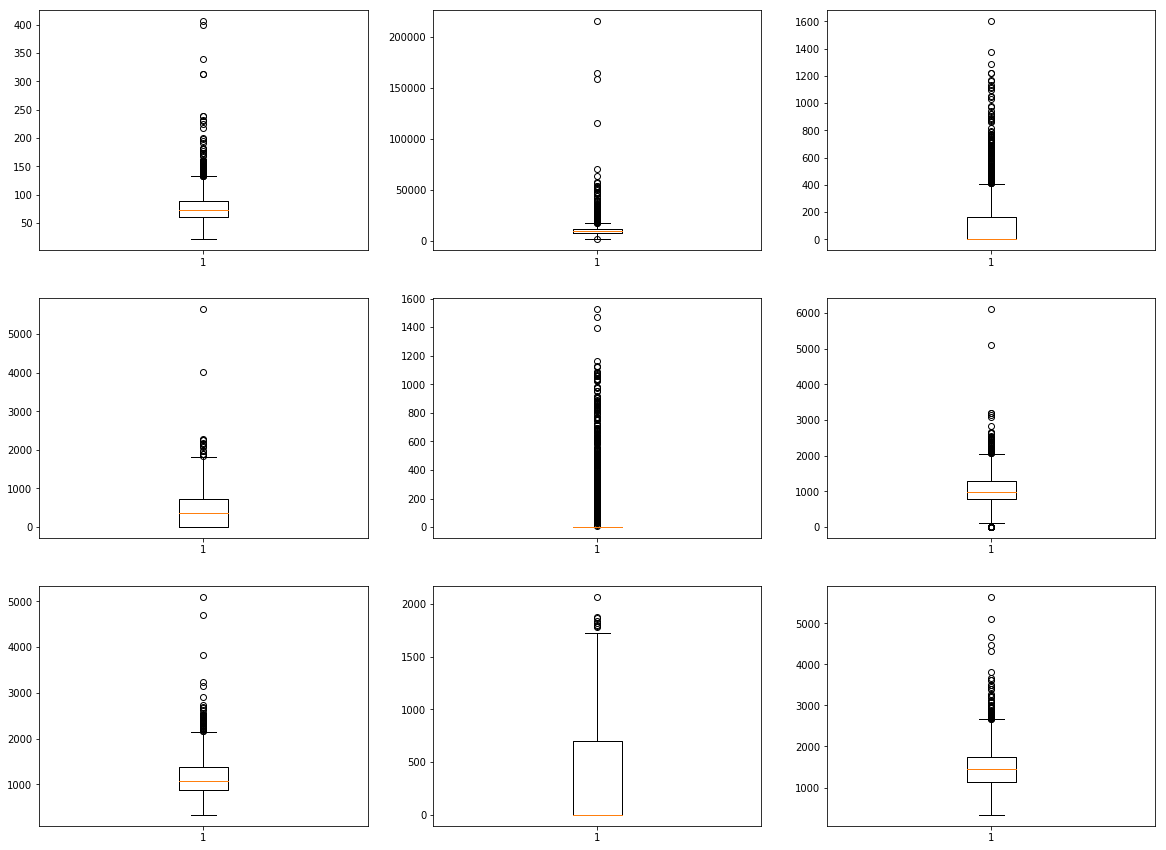

In [217]:
plt.figure(figsize=[20,15])
i=1
for x in col_num:
    plt.subplot(3,3,i)
    plt.boxplot(dall2[x])
    i=i+1
plt.show()

In [218]:
# For LotFrontage
dall2.loc[dall2['LotFrontage'] > dall2['LotFrontage'].quantile(0.75) + (dall2['LotFrontage'].quantile(0.75) - dall2['LotFrontage'].quantile(0.25))*1.5,'LotFrontage'] = dall2['LotFrontage'].quantile(0.75) + (dall2['LotFrontage'].quantile(0.75) - dall2['LotFrontage'].quantile(0.25))*1.5
#dall2.loc[dall2['PC3'] < dall2['PC3'].quantile(0.25) - (dall2['PC3'].quantile(0.75) - dall2['PC3'].quantile(0.25))*1.5,'PC3'] = dall2['PC3'].quantile(0.25) - (dall2['PC3'].quantile(0.75) - dall2['PC3'].quantile(0.25))*1.5

In [219]:
# For LotArea
dall2.loc[dall2['LotArea'] > dall2['LotArea'].quantile(0.75) + (dall2['LotArea'].quantile(0.75) - dall2['LotArea'].quantile(0.25))*1.5,'LotArea'] = dall2['LotArea'].quantile(0.75) + (dall2['LotArea'].quantile(0.75) - dall2['LotArea'].quantile(0.25))*1.5
dall2.loc[dall2['LotArea'] < dall2['LotArea'].quantile(0.25) - (dall2['LotArea'].quantile(0.75) - dall2['LotArea'].quantile(0.25))*1.5,'LotArea'] = dall2['LotArea'].quantile(0.25) - (dall2['LotArea'].quantile(0.75) - dall2['LotArea'].quantile(0.25))*1.5

In [220]:
# For MasVnrArea
dall2.loc[dall2['MasVnrArea'] > dall2['MasVnrArea'].quantile(0.75) + (dall2['MasVnrArea'].quantile(0.75) - dall2['MasVnrArea'].quantile(0.25))*1.5,'MasVnrArea'] = dall2['MasVnrArea'].quantile(0.75) + (dall2['MasVnrArea'].quantile(0.75) - dall2['MasVnrArea'].quantile(0.25))*1.5
dall2.loc[dall2['MasVnrArea'] < dall2['MasVnrArea'].quantile(0.25) - (dall2['MasVnrArea'].quantile(0.75) - dall2['MasVnrArea'].quantile(0.25))*1.5,'MasVnrArea'] = dall2['MasVnrArea'].quantile(0.25) - (dall2['MasVnrArea'].quantile(0.75) - dall2['MasVnrArea'].quantile(0.25))*1.5

In [221]:
# For BsmtFinSF1
dall2.loc[dall2['BsmtFinSF1'] > dall2['BsmtFinSF1'].quantile(0.75) + (dall2['BsmtFinSF1'].quantile(0.75) - dall2['BsmtFinSF1'].quantile(0.25))*1.5,'BsmtFinSF1'] = dall2['BsmtFinSF1'].quantile(0.75) + (dall2['BsmtFinSF1'].quantile(0.75) - dall2['BsmtFinSF1'].quantile(0.25))*1.5
dall2.loc[dall2['BsmtFinSF1'] < dall2['BsmtFinSF1'].quantile(0.25) - (dall2['BsmtFinSF1'].quantile(0.75) - dall2['BsmtFinSF1'].quantile(0.25))*1.5,'BsmtFinSF1'] = dall2['BsmtFinSF1'].quantile(0.25) - (dall2['BsmtFinSF1'].quantile(0.75) - dall2['BsmtFinSF1'].quantile(0.25))*1.5

In [223]:
# For TotalBsmtSF
dall2.loc[dall2['TotalBsmtSF'] > dall2['TotalBsmtSF'].quantile(0.75) + (dall2['TotalBsmtSF'].quantile(0.75) - dall2['TotalBsmtSF'].quantile(0.25))*1.5,'TotalBsmtSF'] = dall2['TotalBsmtSF'].quantile(0.75) + (dall2['TotalBsmtSF'].quantile(0.75) - dall2['TotalBsmtSF'].quantile(0.25))*1.5
dall2.loc[dall2['TotalBsmtSF'] < dall2['TotalBsmtSF'].quantile(0.25) - (dall2['TotalBsmtSF'].quantile(0.75) - dall2['TotalBsmtSF'].quantile(0.25))*1.5,'TotalBsmtSF'] = dall2['TotalBsmtSF'].quantile(0.25) - (dall2['TotalBsmtSF'].quantile(0.75) - dall2['TotalBsmtSF'].quantile(0.25))*1.5

In [224]:
# For 1stFlrSF
dall2.loc[dall2['1stFlrSF'] > dall2['1stFlrSF'].quantile(0.75) + (dall2['1stFlrSF'].quantile(0.75) - dall2['1stFlrSF'].quantile(0.25))*1.5,'1stFlrSF'] = dall2['1stFlrSF'].quantile(0.75) + (dall2['1stFlrSF'].quantile(0.75) - dall2['1stFlrSF'].quantile(0.25))*1.5
dall2.loc[dall2['1stFlrSF'] < dall2['1stFlrSF'].quantile(0.25) - (dall2['1stFlrSF'].quantile(0.75) - dall2['1stFlrSF'].quantile(0.25))*1.5,'1stFlrSF'] = dall2['1stFlrSF'].quantile(0.25) - (dall2['1stFlrSF'].quantile(0.75) - dall2['1stFlrSF'].quantile(0.25))*1.5

In [225]:
# For 2ndFlrSF
dall2.loc[dall2['2ndFlrSF'] > dall2['2ndFlrSF'].quantile(0.75) + (dall2['2ndFlrSF'].quantile(0.75) - dall2['2ndFlrSF'].quantile(0.25))*1.5,'2ndFlrSF'] = dall2['2ndFlrSF'].quantile(0.75) + (dall2['2ndFlrSF'].quantile(0.75) - dall2['2ndFlrSF'].quantile(0.25))*1.5
dall2.loc[dall2['2ndFlrSF'] < dall2['2ndFlrSF'].quantile(0.25) - (dall2['2ndFlrSF'].quantile(0.75) - dall2['2ndFlrSF'].quantile(0.25))*1.5,'2ndFlrSF'] = dall2['2ndFlrSF'].quantile(0.25) - (dall2['2ndFlrSF'].quantile(0.75) - dall2['2ndFlrSF'].quantile(0.25))*1.5

In [226]:
# For GrLivArea
dall2.loc[dall2['GrLivArea'] > dall2['GrLivArea'].quantile(0.75) + (dall2['GrLivArea'].quantile(0.75) - dall2['GrLivArea'].quantile(0.25))*1.5,'GrLivArea'] = dall2['GrLivArea'].quantile(0.75) + (dall2['GrLivArea'].quantile(0.75) - dall2['GrLivArea'].quantile(0.25))*1.5
dall2.loc[dall2['GrLivArea'] < dall2['GrLivArea'].quantile(0.25) - (dall2['GrLivArea'].quantile(0.75) - dall2['GrLivArea'].quantile(0.25))*1.5,'GrLivArea'] = dall2['GrLivArea'].quantile(0.25) - (dall2['GrLivArea'].quantile(0.75) - dall2['GrLivArea'].quantile(0.25))*1.5

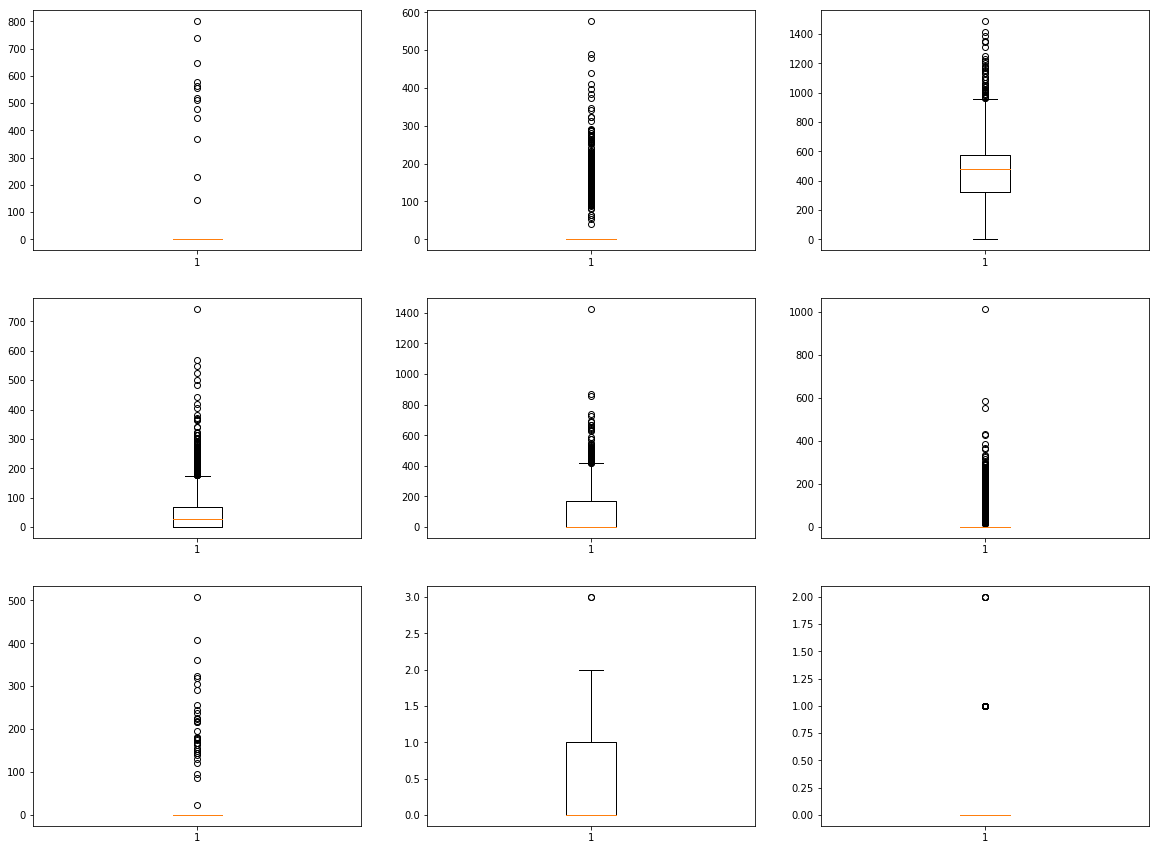

In [227]:
col_num = ['PoolArea','ScreenPorch','GarageArea','OpenPorchSF','WoodDeckSF','EnclosedPorch','3SsnPorch','BsmtFullBath','BsmtHalfBath']

plt.figure(figsize=[20,15])
i=1
for x in col_num:
    plt.subplot(3,3,i)
    plt.boxplot(dall2[x])
    i=i+1
plt.show()

In [228]:
# For GarageArea
dall2.loc[dall2['GarageArea'] > dall2['GarageArea'].quantile(0.75) + (dall2['GarageArea'].quantile(0.75) - dall2['GarageArea'].quantile(0.25))*1.5,'GarageArea'] = dall2['GarageArea'].quantile(0.75) + (dall2['GarageArea'].quantile(0.75) - dall2['GarageArea'].quantile(0.25))*1.5
dall2.loc[dall2['GarageArea'] < dall2['GarageArea'].quantile(0.25) - (dall2['GarageArea'].quantile(0.75) - dall2['GarageArea'].quantile(0.25))*1.5,'GarageArea'] = dall2['GarageArea'].quantile(0.25) - (dall2['GarageArea'].quantile(0.75) - dall2['GarageArea'].quantile(0.25))*1.5

In [229]:
# For OpenPorchSF
dall2.loc[dall2['OpenPorchSF'] > dall2['OpenPorchSF'].quantile(0.75) + (dall2['OpenPorchSF'].quantile(0.75) - dall2['OpenPorchSF'].quantile(0.25))*1.5,'OpenPorchSF'] = dall2['OpenPorchSF'].quantile(0.75) + (dall2['OpenPorchSF'].quantile(0.75) - dall2['OpenPorchSF'].quantile(0.25))*1.5
dall2.loc[dall2['OpenPorchSF'] < dall2['OpenPorchSF'].quantile(0.25) - (dall2['OpenPorchSF'].quantile(0.75) - dall2['OpenPorchSF'].quantile(0.25))*1.5,'OpenPorchSF'] = dall2['OpenPorchSF'].quantile(0.25) - (dall2['OpenPorchSF'].quantile(0.75) - dall2['OpenPorchSF'].quantile(0.25))*1.5

In [230]:
# For WoodDeckSF
dall2.loc[dall2['WoodDeckSF'] > dall2['WoodDeckSF'].quantile(0.75) + (dall2['WoodDeckSF'].quantile(0.75) - dall2['WoodDeckSF'].quantile(0.25))*1.5,'WoodDeckSF'] = dall2['WoodDeckSF'].quantile(0.75) + (dall2['WoodDeckSF'].quantile(0.75) - dall2['WoodDeckSF'].quantile(0.25))*1.5
dall2.loc[dall2['WoodDeckSF'] < dall2['WoodDeckSF'].quantile(0.25) - (dall2['WoodDeckSF'].quantile(0.75) - dall2['WoodDeckSF'].quantile(0.25))*1.5,'WoodDeckSF'] = dall2['WoodDeckSF'].quantile(0.25) - (dall2['WoodDeckSF'].quantile(0.75) - dall2['WoodDeckSF'].quantile(0.25))*1.5

In [231]:
# For BsmtFullBath
dall2.loc[dall2['BsmtFullBath'] > dall2['BsmtFullBath'].quantile(0.75) + (dall2['BsmtFullBath'].quantile(0.75) - dall2['BsmtFullBath'].quantile(0.25))*1.5,'BsmtFullBath'] = dall2['BsmtFullBath'].quantile(0.75) + (dall2['BsmtFullBath'].quantile(0.75) - dall2['BsmtFullBath'].quantile(0.25))*1.5
dall2.loc[dall2['BsmtFullBath'] < dall2['BsmtFullBath'].quantile(0.25) - (dall2['BsmtFullBath'].quantile(0.75) - dall2['BsmtFullBath'].quantile(0.25))*1.5,'BsmtFullBath'] = dall2['BsmtFullBath'].quantile(0.25) - (dall2['BsmtFullBath'].quantile(0.75) - dall2['BsmtFullBath'].quantile(0.25))*1.5

### Data Preparation: Creating Dummy Variables

In [232]:
dall3 = dall2.copy()

In [237]:
dall3.loc[:,dall3.dtypes=='object'].columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [238]:
col_list = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig','LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType','HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd','MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating','HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional','FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

for x in col_list:
    h = pd.get_dummies(dall3[x],prefix=x,drop_first=True)
    dall3 = pd.concat([dall3,h],axis=1)

In [239]:
dall3.shape

(2919, 295)

In [241]:
# Dropping main object variable
dall3.drop(col_list,axis=1,inplace=True)

In [242]:
dall3.shape

(2919, 255)

In [244]:
dall3.loc[:,dall3.dtypes=='object'].columns

Index([], dtype='object')

All the columns are in numeric format now.

In [246]:
# Converting Id as Object
dall3['Id'] = dall3['Id'].astype('object')

In [247]:
dall3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Columns: 255 entries, Id to SaleCondition_Partial
dtypes: float64(18), int64(19), object(1), uint8(217)
memory usage: 1.5+ MB


### Data Preparation: Standardization

In [262]:
dall4 = dall3.copy()

In [263]:
dall4.drop('Id',axis=1,inplace=True)

In [264]:
scaler = StandardScaler()

In [265]:
col_list = list(dall4.columns)
col_list.remove('SalePrice')

In [266]:
dall4[col_list] = scaler.fit_transform(dall4[col_list])

### Data Preparation: PCA

In [268]:
dall5 = dall4[col_list]

In [269]:
# Applying PCA on data
pca = PCA(svd_solver='randomized', random_state=15)
pca.fit(dall5)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=15,
  svd_solver='randomized', tol=0.0, whiten=False)

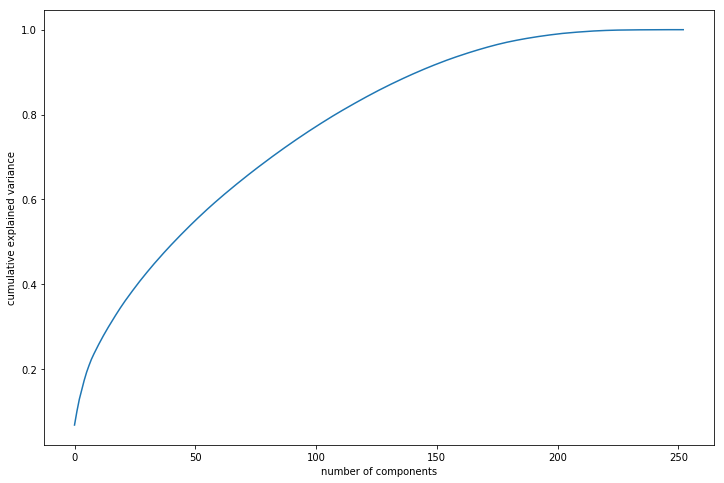

In [270]:
#SCREE plot
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [271]:
# Applying PCA for 150 PCs
pca_final = IncrementalPCA(n_components=150)
dall_pca = pca_final.fit_transform(dall5)

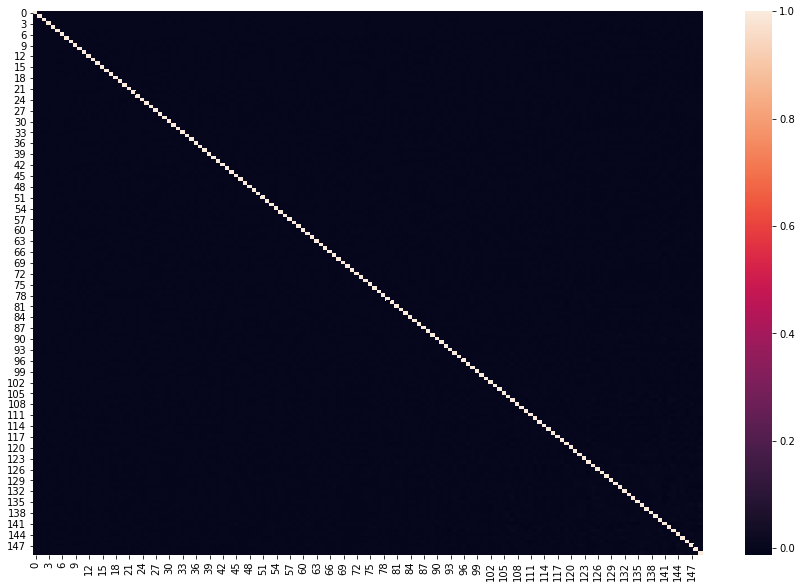

In [272]:
# Coorelation between new 150 PCs
plt.figure(figsize = (15,10))
sns.heatmap(np.corrcoef(dall_pca.transpose()),annot = False)

None of the PC has pairwise correlation.

In [276]:
# Creating Column names for PCs
col_list = list()
for x in range(1,151,1):
    col_list.append('PC'+str(x))

In [277]:
dall_pca_new = pd.DataFrame(data=dall_pca, columns = col_list)

In [280]:
dall_pca_new = pd.concat([dall_pca_new,dall3['SalePrice']],axis=1)

### Data Preparation: Train Test Split

In [283]:
dtest1 = dall_pca_new.loc[dall_pca_new['SalePrice']==0]
dtrain1 = dall_pca_new.loc[~(dall_pca_new['SalePrice']==0)]

In [284]:
dtrain1.shape

(1460, 151)

In [285]:
dtest1.shape

(1459, 151)

In [325]:
dtrainX = dtrain1.drop('SalePrice',axis=1)
dtrainy = dtrain1['SalePrice']
dtestX = dtest1.drop('SalePrice',axis=1)

## Model Building

In [326]:
lm = LinearRegression()
lm.fit(dtrainX,dtrainy)

rfe = RFE(lm,62)
rfe = rfe.fit(dtrainX,dtrainy)

In [327]:
col_list = dtrainX.columns[rfe.support_]
dtrainX = dtrainX[col_list]

In [328]:
# Adding a constant variable 
import statsmodels.api as sm  
dtrainX = sm.add_constant(dtrainX)
lm1 = sm.OLS(dtrainy,dtrainX).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     148.7
Date:                Wed, 06 Mar 2019   Prob (F-statistic):               0.00
Time:                        01:30:14   Log-Likelihood:                -17063.
No. Observations:                1460   AIC:                         3.425e+04
Df Residuals:                    1397   BIC:                         3.459e+04
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         1.8e+05    780.431    230.607      0.0

In [329]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = dtrainX.drop('const',axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
29,PC68,1.09
38,PC107,1.07
55,PC137,1.07
23,PC50,1.07
15,PC33,1.07
31,PC82,1.06
13,PC31,1.06
41,PC114,1.06
32,PC86,1.06
28,PC66,1.06


Multi-Collinearity not found.

### Model Performance

In [330]:
#Predicted value for train dataset
y_pred = lm1.predict(dtrainX)

Text(0.5,0,'Errors')

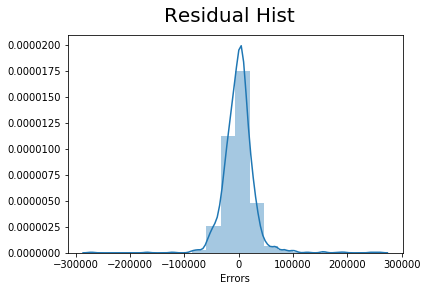

In [331]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((dtrainy - y_pred), bins = 20)
fig.suptitle('Residual Hist', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 10) 

Text(0.5,0,'Price')

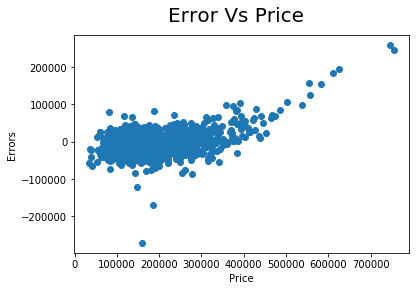

In [332]:
# Plot the scatter of the error terms/price
fig = plt.figure()
plt.scatter(dtrainy,dtrainy-y_pred)
fig.suptitle('Error Vs Price', fontsize = 20)                  # Plot heading 
plt.ylabel('Errors', fontsize = 10)
plt.xlabel('Price', fontsize = 10) 

Text(0.5,0,'Price')

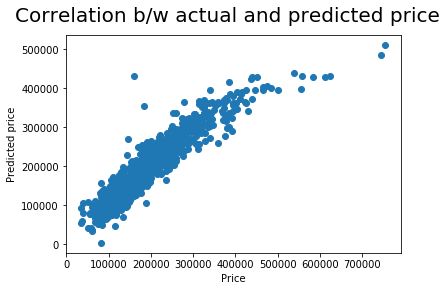

In [333]:
# Plot the scatter of the error terms/price
fig = plt.figure()
plt.scatter(dtrainy,y_pred)
fig.suptitle('Correlation b/w actual and predicted price', fontsize = 20)                  # Plot heading 
plt.ylabel('Predicted price', fontsize = 10)
plt.xlabel('Price', fontsize = 10) 

## Applying Model on Test

In [334]:
# Selecting same columns as Train
dtestX = dtestX[col_list]

In [335]:
# Adding a constant variable 
import statsmodels.api as sm  
dtestX = sm.add_constant(dtestX)

In [353]:
ypred = lm1.predict(dtestX)

In [363]:
ypred = pd.DataFrame(ypred,columns=['SalePrice'])

In [389]:
ypred = ypred.set_index(dtest['Id'])
ypred.to_csv('Submit.csv')